# Soal 10

1. [Buat rangkuman numerik dan grafiknya di dataset Weekly. Apakah ada pola pola tertentu?](#1)
2. [Buat model Logistic Regression menggunakan Direction sebagai response](#2)
3. [Hitung confusion matrixnya](#3)
4. [Buat model Logistic Regression dari data 1990 sampai 2008 dengan prediktor Lag2 dan hitung juga confusion matrixnya](#4)
5. [Ulangi nomor 4 menggunakan model LDA](#5)
6. [Ulangi nomor 4 menggunakan model QDA](#6)
7. [Ulangi nomor 4 menggunakan KNN dengan K = 1](#7)
8. [Metode mana yang paling bagus](#8)
9. [Lakukan eksperimen dengan berbagai prediktor](#9)

## 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from patsy import dmatrices

%matplotlib inline

In [2]:
weekly = pd.read_csv('../dataset/Weekly.csv')

In [3]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
weekly.shape

(1089, 9)

In [5]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.6+ KB


In [6]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [7]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


/home/uulwake/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


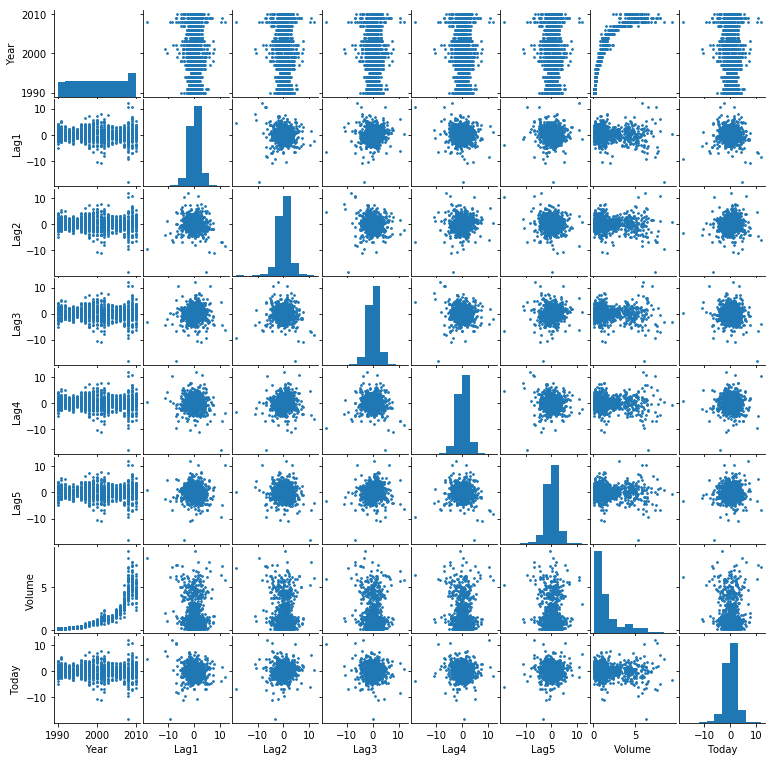

In [8]:
g = sns.PairGrid(weekly, size=10)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(10, 10)

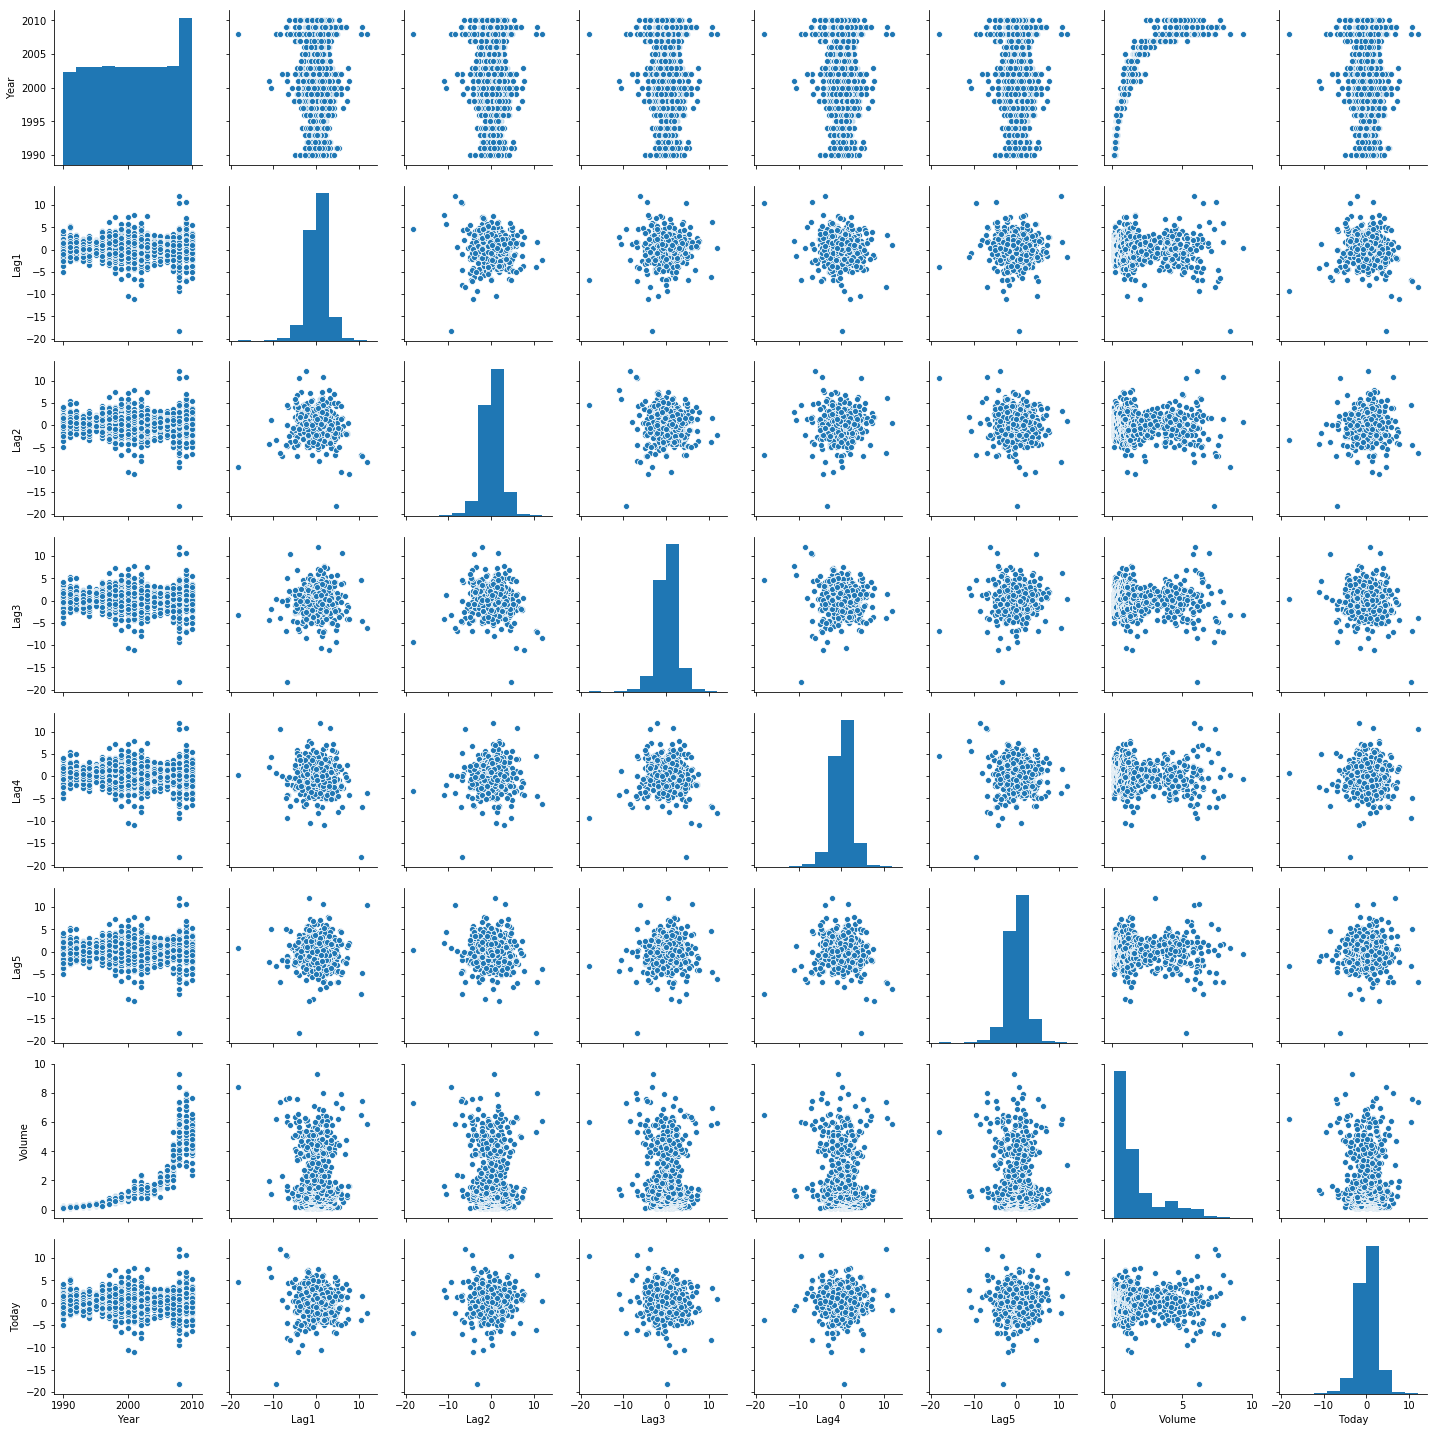

In [9]:
sns.pairplot(weekly)

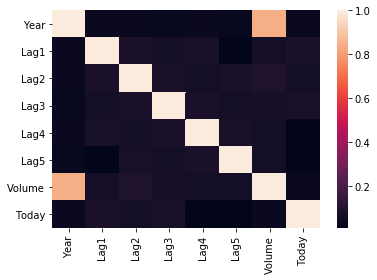

In [10]:
sns.heatmap(abs(weekly.corr()))

dari gambar di atas, Year dan Volume memiliki korelasi yang cukup besar

[kembali ke atas](#Soal-10)

## 2

In [11]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [12]:
lr_column = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
lr = LogisticRegression()

In [13]:
lr_column

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

In [14]:
weekly[lr_column]

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,0.712,3.514,-2.576,-0.270,0.816,0.153728
5,1.178,0.712,3.514,-2.576,-0.270,0.154444
6,-1.372,1.178,0.712,3.514,-2.576,0.151722
7,0.807,-1.372,1.178,0.712,3.514,0.132310
8,0.041,0.807,-1.372,1.178,0.712,0.143972
9,1.253,0.041,0.807,-1.372,1.178,0.133635


In [15]:
model = lr.fit(weekly[lr_column], weekly['Direction'])

In [16]:
model.coef_

array([[-0.04117292,  0.05846974, -0.01599122, -0.02769998, -0.01440289,
        -0.02212844]])

In [17]:
model.intercept_

array([0.26484745])

kita akan mencari nilai p-value menggunakan statmodel (ini lebih gampang jika menggunakan R). Pertama, kita harus mengubah nilai Direction menjadi 0 atau 1

In [18]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [19]:
weekly['Direction'] = weekly['Direction'].map({'Down':0, 'Up':1})

In [20]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [21]:
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly, return_type='dataframe')
logit = sm.Logit(y, X) 
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:                0.006580
Time:                        15:24:27   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Prediktor Lag2 adalah satu satunya prediktor yang signifikan. 

Note : Sebaiknya dikerjakan di R

[kembali ke atas](#Soal-10)

## 3

In [23]:
res = lr.predict(weekly[lr_column])

In [24]:
lr_predict = []
for item in res:
    if item == 'Up':
        lr_predict.append(1)
    else:
        lr_predict.append(0)
        

In [25]:
lr_predict

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [26]:
conf_matrix = confusion_matrix(weekly['Direction'], lr_predict)

In [27]:
conf_matrix

array([[ 55, 429],
       [ 47, 558]])

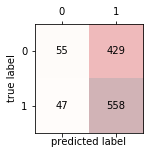

In [28]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,
        s=conf_matrix[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

False Positive = 429
False Negative = 47

[kembali ke atas](#Soal-10)

## 4

In [29]:
weekly['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [30]:
year90_08 = weekly[(weekly['Year'] >= 1990) & (weekly['Year'] <= 2008)]

In [31]:
year90_08

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
5,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,0
6,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,1
7,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,1
8,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,1
9,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,0


In [32]:
X = year90_08['Lag2']

In [33]:
X.shape

(985,)

In [34]:
# reshape X
X = X.values.reshape(np.shape(X)[0], 1)

In [35]:
X.shape

(985, 1)

In [36]:
model = lr.fit(X, year90_08['Direction'])

In [37]:
year09_10 = weekly[(weekly['Year'] >= 2009) & (weekly['Year'] <= 2010)]

In [38]:
year09_10.shape

(104, 9)

In [39]:
X = year09_10['Lag2']

In [40]:
X = X.values.reshape(np.shape(X)[0], 1)

In [41]:
conf_matrix = confusion_matrix(year09_10['Direction'], lr.predict(X))

In [42]:
conf_matrix

array([[ 9, 34],
       [ 5, 56]])

In [43]:
# Returns the mean accuracy on the given test data and labels
lr.score(X, year09_10['Direction'])

0.625

[kembali ke atas](#Soal-10)

## 5

In [44]:
X_LDA = year90_08['Lag2']
X_LDA = X_LDA.values.reshape(np.shape(X_LDA)[0], 1)

In [45]:
# Training
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_LDA, year90_08['Direction'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [46]:
# Testing
X_LDA = year09_10['Lag2']
X_LDA = X_LDA.values.reshape(np.shape(X_LDA)[0], 1)

In [47]:
conf_matrix = confusion_matrix(year09_10['Direction'], LDA.predict(X_LDA))

In [48]:
conf_matrix

array([[ 9, 34],
       [ 5, 56]])

In [49]:
LDA.score(X_LDA, year09_10['Direction'])

0.625

[kembali ke atas](#Soal-10)

## 6

In [50]:
X_QDA = year90_08['Lag2']
X_QDA = X_QDA.values.reshape(np.shape(X_QDA)[0], 1)

In [51]:
# Training
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_QDA, year90_08['Direction'])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [52]:
# Testing
X_QDA = year09_10['Lag2']
X_QDA = X_QDA.values.reshape(np.shape(X_QDA)[0], 1)

In [53]:
conf_matrix = confusion_matrix(year09_10['Direction'], QDA.predict(X_QDA))

In [54]:
conf_matrix

array([[ 0, 43],
       [ 0, 61]])

In [55]:
QDA.score(X_QDA, year09_10['Direction']) 

0.5865384615384616

[kembali ke atas](#Soal-10)

## 7

In [56]:
X_KNN = year90_08['Lag2']
X_KNN = X_KNN.values.reshape(np.shape(X_KNN)[0], 1)

In [57]:
# Training
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_KNN, year90_08['Direction'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [58]:
# Testing
X_KNN = year09_10['Lag2']
X_KNN = X_KNN.values.reshape(np.shape(X_KNN)[0], 1)

In [59]:
conf_matrix = confusion_matrix(year09_10['Direction'], KNN.predict(X_KNN))

In [60]:
conf_matrix

array([[21, 22],
       [31, 30]])

In [61]:
KNN.score(X_KNN, year09_10['Direction']) 

0.49038461538461536

[kembali ke atas](#Soal-10)

## 8

Metode yang terbaik ialah KNN dan Logistic Regression yang memberikan hasil tertinggi

[kembali ke atas](#Soal-10)

## 9

Silahkan dilakukan sendiri. Konsepnya sama seperti soal nomor 4, 5, 6, 7, 8

[kembali ke atas](#Soal-10)